In [2]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from radar import *
from pointprocess.plotting import *
import matplotlib as mpl
%matplotlib inline

In [3]:
import cartopy.feature as cfeature

In [4]:
city = 'PHILADELPHIA'
TOP50 = pd.read_csv('{c}/TOP50_events.csv'.format(c=city), parse_dates=[0,1])
c = Radar(city, TOP50.t_begin[0], how='hdf5', store='{c}/TOP50.h5', make_rate=4)
c.time = np.concatenate([Radar(city, TOP50.t_begin[n], how='hdf5', store='{c}/TOP50.h5', make_rate=4).time for n in range(50)], axis=0)
c.box = np.concatenate([Radar(city, TOP50.t_begin[n], how='hdf5', store='{c}/TOP50.h5', make_rate=4).box for n in range(50)], axis=0)

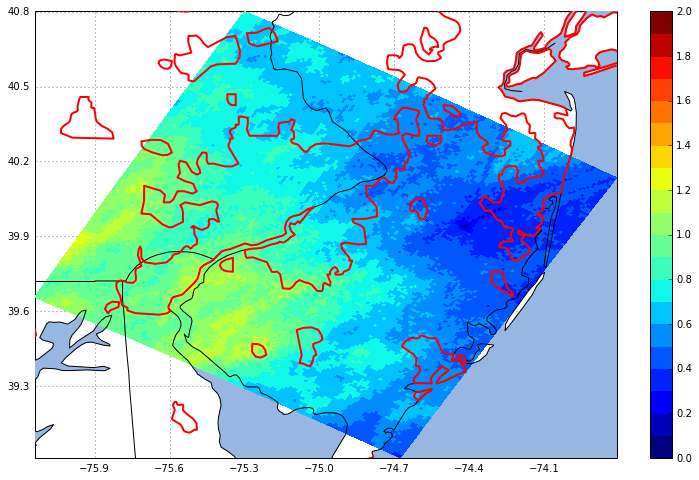

In [5]:
kwargs = dict(cmap=mpl.cm.get_cmap('jet',20), vmin=0, vmax=2)
fig = plt.figure(figsize=(12,8))
ax = plt.subplot(1,1,1, projection=ccrs.PlateCarree())

scat = ax.pcolor(c.lon, c.lat, np.nanmean(c.box, axis=0), zorder=5, **kwargs)
urban(background_scale(ax, '10m'), linewidth=2)
plt.colorbar(scat, ax=ax, fraction=0.05)
plt.savefig('{c}/Mean rain rate TOP50.png'.format(c=city))

In [57]:
# Probability of exceedance
frequency={'count':[], '2':[], '10':[], '25':[], '50':[]}

for n in range(50):
    c = Radar(city, TOP50.t_begin[n], how='hdf5', store='{c}/TOP50.h5', make_rate=4)
    frequency['count'].append(np.sum(np.isfinite(c.box), axis=0))
    for thresh in [2, 10, 25, 50]:
        frequency[str(thresh)].append(np.sum(c.box>thresh, axis=0))

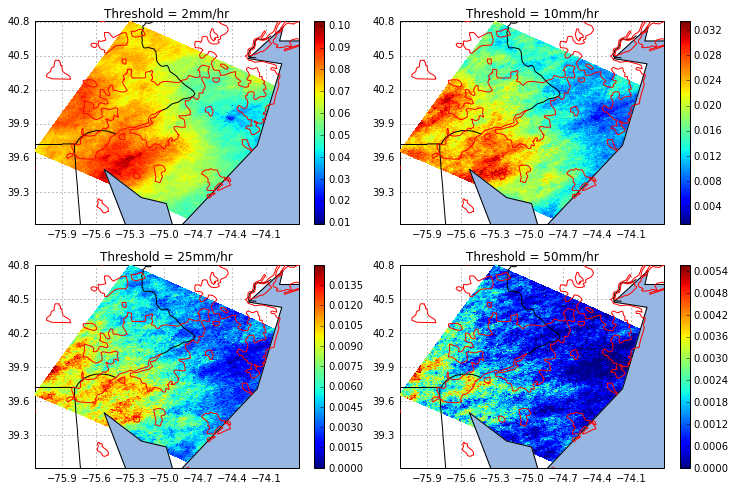

In [58]:
fig = plt.figure(figsize=(12,8))
for n, thresh in zip(range(4), ['2', '10', '25', '50']):
    ax = plt.subplot(2, 2, n+1, projection=ccrs.PlateCarree())
    urban(background(ax))
    a = np.sum(frequency[thresh], axis=0)/np.sum(frequency['count'], axis=0).astype(float)
    scat = ax.pcolor(c.lon, c.lat, a, cmap='jet', zorder=3)
    plt.colorbar(scat, ax=ax, fraction=0.05)
    ax.set_title('Threshold = {thresh}mm/hr'.format(thresh=thresh))
plt.savefig('{c}/Frequency of rainfall above thresholds (TOP50).png'.format(c=city))

This next cell takes about an hour and a half to run

In [29]:
city = 'CHARLOTTE'
TOP50 = pd.read_csv('{c}/TOP50_events.csv'.format(c=city), parse_dates=[0,1])
c = Radar(city, TOP50.t_begin[0], how='hdf5', store='{c}/TOP50.h5', make_rate=4)
c.time = np.concatenate([Radar(city, TOP50.t_begin[n], how='hdf5', store='{c}/TOP50.h5', make_rate=4).time for n in range(50)], axis=0)
c.box = np.concatenate([Radar(city, TOP50.t_begin[n], how='hdf5', store='{c}/TOP50.h5', make_rate=4).box for n in range(50)], axis=0)

In [30]:
peak_time = {}
computed = pd.HDFStore('{c}/computed.h5'.format(c=city))
for thresh in [2,10,25,50]:
    p = computed['peak_time_TOP50_{thresh}'.format(thresh=thresh)]
    peak_time.update({thresh:p.values})
computed.close()

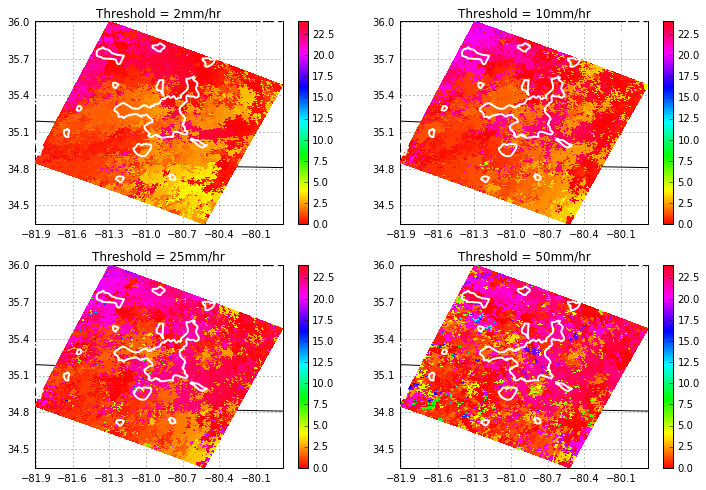

In [31]:
fig = plt.figure(figsize=(12,8))
for n, thresh in zip(range(4), [2, 10,25, 50]):
    ax = plt.subplot(2, 2, n+1, projection=ccrs.PlateCarree())
    #ax.add_geometries(basins, ccrs.PlateCarree(), edgecolor='black', facecolor='None')
    #ax.add_geometries(county, ccrs.PlateCarree(), edgecolor='gray', facecolor='None')
    #ax.set_extent(small_extent, ccrs.PlateCarree())
    urban(background(ax), edgecolor='white', linewidth='2')
    q = peak_time[thresh]
    scat = ax.pcolor(c.lon, c.lat, q.argmax(axis=0)/4., cmap='hsv', vmin=0, vmax=24, zorder=9)
    plt.colorbar(scat, ax=ax, fraction=0.05)
    ax.set_title('Threshold = {thresh}mm/hr'.format(thresh=thresh))
plt.savefig('{c}/Peak time of rainfall above thresholds (TOP50).png'.format(c=city))